In [ ]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

# **Exploring the Data**
## We'll download the imgaes in PNG format from this page, using some helper functions from torchvision and tarfile packages.

In [ ]:
# Download the dataset (tar file)
dataset_url = "http://files.fast.ai/data/cifar10.tgz"
download_url(dataset_url, '.')            # Its download in colab kernal

Using downloaded and verified file: ./cifar10.tgz


In [ ]:
# Extract from archieve
with tarfile.open('cifar10.tgz', 'r:gz') as tar:
  tar.extractall(path=r'C:\Users\jgaur\DeepLearning')

## The dataset is extracted to the directory "C:\Users\jgaur\DeepLearning/data". It contains 2 folders train and test, containing the training set(50000 images) and test set (10000 images) respectively. Each of them contains 10 folders, one for each class of images. Let's verify this using os.listdir.

In [ ]:
data_dir = r'C:\Users\jgaur\DeepLearning/cifar10'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['labels.txt', 'train', 'test']
['cat', 'deer', 'truck', 'automobile', 'airplane', 'bird', 'ship', 'horse', 'frog', 'dog']


## Let's look inside a couple of folders, one from the training set and another from the test set. As an exercise, you can verify that there are an equal number of images for each class, 5000 in the training set and 1000 in the test set.

In [ ]:
airplane_files = os.listdir(data_dir + "/train/airplane")
print("No. of training examples for airplanes : ", len(airplane_files))
print(airplane_files[:5])

No. of training examples for airplanes :  5000
['35570_airplane.png', '11979_airplane.png', '46513_airplane.png', '44741_airplane.png', '49497_airplane.png']


In [ ]:
ship_test_files = os.listdir(data_dir + "/test/ship")
print("No. of test examples for ship : ", len(ship_test_files))
print(ship_test_files[:5])

No. of test examples for ship :  1000
['7418_ship.png', '6737_ship.png', '4125_ship.png', '9291_ship.png', '7793_ship.png']


## The above directory structure (one folder per class) is used byu manu computer vision datasets, and most deep learning libraries provide utilities for working with such datasets. We can use the ImageFolder class from torchvision to load the data as Pytorch tensors.

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [ ]:
dataset = ImageFolder(data_dir+'/train', transform=ToTensor())

## Let's look at a sample elements from the training dataset. Each element is tuple, containing a images tensor and a label. Since the data consists of 32x32 px color images with 3 channels (RGB), each image tensor has the shape (3,32,32).

In [ ]:
image, label = dataset[0]
print(image.shape, label)
image

torch.Size([3, 32, 32]) 0


tensor([[[0.8588, 0.8588, 0.8627,  ..., 0.8510, 0.8471, 0.8392],
         [0.8667, 0.8667, 0.8745,  ..., 0.8588, 0.8549, 0.8471],
         [0.8667, 0.8667, 0.8745,  ..., 0.8588, 0.8549, 0.8471],
         ...,
         [0.8980, 0.9020, 0.9098,  ..., 0.8980, 0.8902, 0.8863],
         [0.8471, 0.8549, 0.8706,  ..., 0.8980, 0.8902, 0.8824],
         [0.7608, 0.7490, 0.7725,  ..., 0.8980, 0.8902, 0.8824]],

        [[0.9333, 0.9333, 0.9373,  ..., 0.9176, 0.9137, 0.9059],
         [0.9412, 0.9412, 0.9490,  ..., 0.9294, 0.9216, 0.9137],
         [0.9412, 0.9412, 0.9490,  ..., 0.9255, 0.9216, 0.9137],
         ...,
         [0.9608, 0.9569, 0.9569,  ..., 0.9412, 0.9412, 0.9412],
         [0.9020, 0.9098, 0.9255,  ..., 0.9412, 0.9412, 0.9373],
         [0.8157, 0.8039, 0.8275,  ..., 0.9412, 0.9412, 0.9373]],

        [[0.9608, 0.9608, 0.9647,  ..., 0.9490, 0.9412, 0.9412],
         [0.9686, 0.9686, 0.9765,  ..., 0.9608, 0.9529, 0.9490],
         [0.9686, 0.9686, 0.9765,  ..., 0.9569, 0.9529, 0.

In [ ]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## We can view the image using matplotlib, but we need to change the tensor dimensions to (32,32,3) Let's create a helper function to display an image and its label.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_example(img, label):
  print("Label : ", dataset.classes[label], "("+str(label)+")")
  plt.imshow(img.permute(1,2,0))

## Let's look at the couple of images from the dataset. As you can tell, the 32x32px images are quite difficult to identify, even for the human eye. Try changing the indices below to view different images.

Label :  airplane (0)


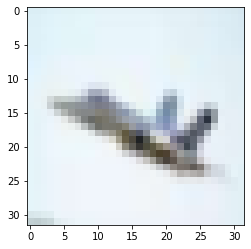

In [ ]:
show_example(image, label)

Label :  airplane (0)


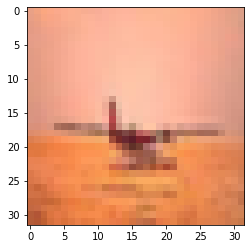

In [ ]:
image, label = dataset[1099]
show_example(image, label)

Label :  bird (2)


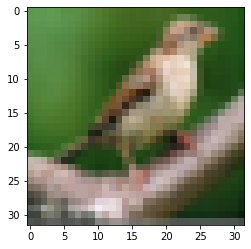

In [ ]:
image, label = dataset[10333]
show_example(image, label)

# **Training and Validation Datasets**
## While building real world machine learning model, it is quite common to split the dataset into 3 parts:
## 1. Training set - used to train the model i.e. compute the loss and adjust the weights of the model using gradient descent.
## 2. Validation set - used to evaluate the model while training, adjust hyperparameters(learning rate etc.) and pick the best version of the model.
## 3. Test set - used to compare different models, or different type of modeling approahces, and report the final accuracy of the model.
## Since, there's no predefined validation set, we can set aside a small portion (5000 imahges) of the training set to be use as tha validation set. We'll use the random split helper function from PyTorch to do this. To ensure that we always create the same validation set we'll aslo set a seed for the random number generator.

In [ ]:
random_seed = 42
torch.manual_seed(random_seed);

In [ ]:
val_size = 5000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

In [ ]:
from torch.utils.data.dataloader import DataLoader
batch_size = 128

In [ ]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True) 
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True) ## This is simply an optimization. If we have a more CPU cores, we can use those
                                                                          ## cores to load the data in paralell while creating a batch

torch.Size([128, 3, 32, 32])


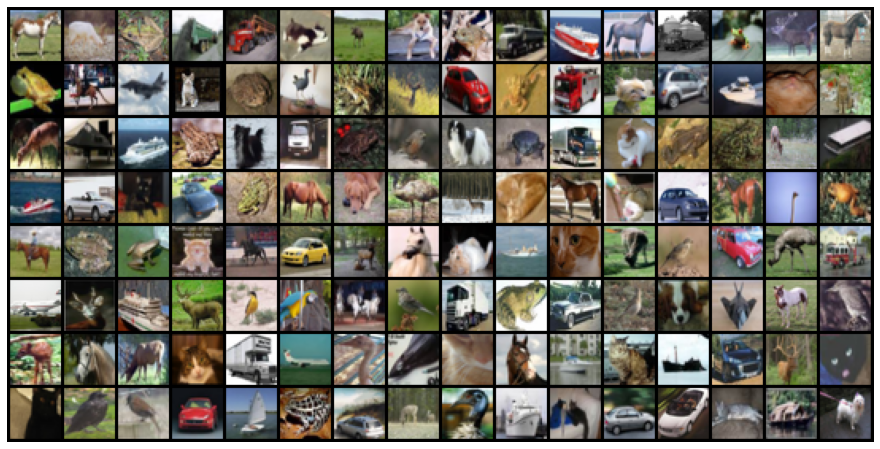

In [ ]:
from torchvision.utils import make_grid

for images, labels in train_dl:
  print(images.shape)
  plt.figure(figsize=(16,8))
  plt.axis('off')
  plt.imshow(make_grid(images, nrow=16).permute(1,2,0))
  break

# **Defining the Model (Convoutional Neural Network)**
## In our previous tutorial, we defined a deep neural network with fully-connected layers using nn.Linear. For this tutorial however, we will use a convolutional neural network , using the nn.Conv2d class from PyTorch.

In [ ]:
def apply_kernel(image, kernel):
  ri, ci = image.shape    # image dimensions
  rk, ck = kernel.shape   # kernel dimensions
  ro, co = ri-rk+1, ci-ck+1
  output = torch.zeros([ro,co])
  for i in range(ro):
    for j in range(co):
      output[i,j] = torch.sum(image[i:i+rk, j:j+ck] * kernel)
  return output

In [ ]:
sample_image = torch.tensor([
                             [3, 3, 2, 1, 0],
                             [0, 0, 1, 3, 1],
                             [3, 1, 2, 2, 3],
                             [2, 0, 0, 2, 2],
                             [2, 0, 0, 0, 1]  
], dtype=torch.float32)

sample_kernel = torch.tensor([
                              [0, 1, 2],
                              [2, 2, 0],
                              [0, 1, 2]
], dtype=torch.float32)

apply_kernel(sample_image, sample_kernel)

tensor([[12., 12., 17.],
        [10., 17., 19.],
        [ 9.,  6., 14.]])

## For multi-channel images, a different kernalis applied to each channel, and the output are added together pixel-wise.

## There are certain advantages offered by convolutinal layers when working with image data:
## **Fewer parameters** : A small set of parameters (the kernel) is used to calculate output of the entire image, so the model has much fewer parameters compared to a fully connected layer.
## **Sparsity of connections** : In each layer, each output element only depends on a small number of input elements, which make the forward and backward passes more efficient.
## **Parameter sharing and spatial invariance** : The features learned by a kernel in one part of the image can be used to detect similar pattern in a different part of another image.
## We will also a max-pooling layers to progressively decrease the height & width of the output tensor from each  convolutional layer.
## Before we define the entire model, let's look at how a single convolutional layer followed by a max-pooling layer operates on the data.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
simple_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1), ## stride=1 means we r shifting the kernel by 1 pixel in each tym.
    nn.MaxPool2d(2,2)
)

In [ ]:
for images, labels in train_dl:
  print("Image.shape : ", images.shape)
  output = simple_model(images)
  print("Output.shape : ", output.shape)
  break

Image.shape :  torch.Size([128, 3, 32, 32])
Output.shape :  torch.Size([128, 8, 16, 16])


## The Conv2d layer transforms a 3-channel image to 16-channel feature map, and the MaxPool2d layer halves the height and width. The feature map gets smaller as add more layers, until we are finally left with a small fetaure map, which can be flattened into a vector. We can then add some fully connected layers at the end to get vector of size 10 for each image.
## Let's define the model by extending an ImageClassificationBase class which contains helper methods for training & validation.

In [ ]:
def acuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds == labels ).item() / len(preds))
  
class ImageClassificatinBase(nn.Module):
  def training_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    return loss
  
  def validation_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    acc = acuracy(out, labels)
    return {'val_loss': loss, 'val_acc': acc}
      
  def validation_epoch_end(self, output):
    batch_losses = [x['val_loss'] for x in output]
    epoch_losses = torch.stack(batch_losses).mean()
    batch_accs = [x['val_acc'] for x in output]
    epoch_accs = torch.stack(batch_accs).mean()
    return {'val_loss': epoch_losses.item(), 'val_acc': epoch_accs.item()}

  def epoch_end(self, epoch, result):
    print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
        epoch, result['train_loss'], result['val_loss'], result['val_acc']))

## **We'll use nn.Sequential to chain the layers and activations functions into a single network architecture**.

In [ ]:
class Cifar10CnnModel(ImageClassificatinBase):
  def __init__(self):
    super().__init__()
    self.network = nn.Sequential(
        nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2),     # output: 64 x 16 x 16

        nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2),      # output: 64 x 8 x 8

        nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2),       # output: 256 x 4 x 4

        nn.Flatten(),
        nn.Linear(256*4*4, 1024),
        nn.ReLU(),
        nn.Linear(1024, 512),
        nn.ReLU(),
        nn.Linear(512, 10)
    )
    
  def forward(self, xb):
        return self.network(xb)

In [ ]:
model = Cifar10CnnModel()
model

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten()
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_features=1024, out_features

## Let's verify that the model produces the expected output on a batch of training data. The 10 outputs for each image can be interpreted as probablitites for the 10 target classes (after applyig softmax), and the class with the highest probability is chosen as the label predicted by the model for the input image.

In [ ]:
for images, labels in train_dl:
  print("Images.shape : ", images.shape)
  out = model(images)
  print("Out.shape : ", out.shape)
  print("out[0] : ", out[0])
  break

Images.shape :  torch.Size([128, 3, 32, 32])
Out.shape :  torch.Size([128, 10])
out[0] :  tensor([-2.7895e-02,  2.6116e-02, -2.9250e-02, -8.7844e-05,  3.5245e-02,
        -2.5369e-02, -5.5220e-03, -1.6882e-02,  1.9319e-02, -3.8725e-02],
       grad_fn=<SelectBackward>)


## To seamlessly use a GPU, if one is available, we define a couple of hepler functions (get_default_device &  to_device ) and a helper class DeviceDataLoader to move  our model & data to the GPU as required.

In [ ]:
def get_default_device():
  """ Pick GPU if available, else CPU """
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')

def to_device(data, device):
  """ Move tensors to chossen device """
  if isinstance(data, (tuple, list)):
    return [to_device(x, device) for x in data]
  return data.to(device, non_blocking=True)

class DeviceDataLoader():
  """ Wrap a data loader to move data to a device """
  def __init__(self, dl, device):
    self.dl = dl
    self.device = device
  
  def __iter__(self):
    for x in self.dl:
      yield to_device(x, self.device)
  
  def __len__(self):
    """ Number of batches """
    return len(self.dl)

## Based on where  you're running this notebook, your default device could be a CPU ( torch.device('cpu') ) or a GPU ( torch.device('cuda') )

In [ ]:
device = get_default_device()
device

device(type='cuda')

## We can now wrap our training and validation data loaders using DeviceDataLoader for automatically transfering batches of data to the GPU (if available), and use to_device to move our model to the GPU (if available).

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

# **Training the Model**


In [ ]:
@torch.no_grad()  # when this function is being executed don't try gradients
def evaluate(model, val_loader):
  model.eval()
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

def fit(epochs, model, lr, val_dl, train_dl, optim_func=torch.optim.Adam):     # Adam specially for image dataset
  history = []                                                             
  optiimizer = optim_func(model.parameters(), lr)
  for epoch in range(epochs):
    # Training Phase
    model.train()
    train_losses = []
    for batch in train_dl:
      loss = model.training_step(batch)
      train_losses.append(loss)
      loss.backward()
      optiimizer.step()
    # Validatin phase
    result = evaluate(model, val_dl)
    result['train_loss'] = torch.stack(train_losses).mean().item()
    model.epoch_end(epoch, result)
    history.append(result)
  return history

## Before we begin training, let's instantiate the model once again and see how it performs on the validation set with the initial set of parameters.

In [ ]:
model = to_device(model, device)

In [ ]:
evaluate(model, val_dl)

{'val_acc': 0.0963350161910057, 'val_loss': 2.302917242050171}

## The accuracy is acound 96% , which is what one might expect from a randomly model(since it has  a 1 in 10 channce of getting a label right by guessing randomly.
##  We'll use the following hyperparameters (learning rate, no. of epochs, batch)size etc.) to train our model. As an exercise, you can try changing these to see if you have achieve a higher accuracy in a shorter time.

In [ ]:
num_epochs = 10
lr = 0.01

In [ ]:
history = fit(num_epochs, model, lr, val_dl, train_dl)

Epoch [0], train_loss: 6854.3169, val_loss: 2.5085, val_acc: 0.1097
Epoch [1], train_loss: 2.5838, val_loss: 2.7082, val_acc: 0.1097
Epoch [2], train_loss: 2.7486, val_loss: 2.8920, val_acc: 0.1014
Epoch [3], train_loss: 2.8064, val_loss: 2.7346, val_acc: 0.0986
Epoch [4], train_loss: 2.9329, val_loss: 2.7501, val_acc: 0.0952
Epoch [5], train_loss: 17561084.0000, val_loss: 3.1683, val_acc: 0.1001
Epoch [6], train_loss: 3.0085, val_loss: 3.0904, val_acc: 0.1014
Epoch [7], train_loss: 3.3556, val_loss: 2.8597, val_acc: 0.0963
Epoch [8], train_loss: 3.3402, val_loss: 3.8569, val_acc: 0.1001
Epoch [9], train_loss: 3.2458, val_loss: 3.1844, val_acc: 0.1014


In [ ]:
def plot_accuracy(history):
  accuracies = [x['val_acc'] for x in history]
  plt.plot(accuracies, '-x')
  plt.xlabel('epoch')
  plt.ylabel('accuravy')
  plt.title('Accuracy vs. No. of epochs')

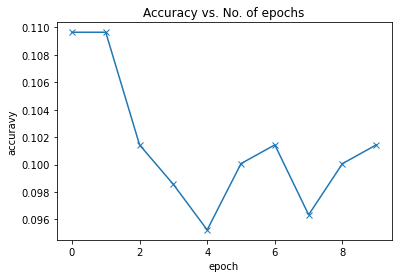

In [ ]:
plot_accuracy(history)

## Our model reaches an acuuracy of around 75%, and by looking at graph, it seems unlikerly that the model will achieve ac accuracy higher than 80$ even after training for a long time. This suggests that we might need to use a more powerful model to capture the relationship between the images and labels more accuratel. This can be done by adding more convolutional layers to our model, or increasing the no. of channels in each convolutional layer, or by using regularization techniques.
## We can also plot the training and validation losses to study the trend.

In [ ]:
 def plot_losses(history):
  train_losses = [x['train_loss'] for x in history]
  val_losses = [x['val_loss'] for x in history]
  plt.plot(train_losses, '-bx')
  plt.plot(val_losses, '-rx')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['Training', 'Validation'])
  plt.title('Loss vs. No. of epochs')

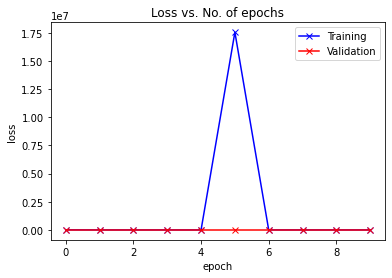

In [ ]:
plot_losses(history)

## Initialy, both the training and validation losses seem to decrease over time. However, if we train the model for long enough, you will notice that the training loss continues to decrease, while the validation loss stops decreasing, and even starts to increase after a ceratain point!

## This phenomenon is called **overfitting**, and it is the no.1 why amsny machine learning models give rather terrible results on real-world data. It happens because the model, in an attempt to minimize the loss, starts to learn pattern are unique to the training data, somethimes even memorizing specific training examples. Because of this, the model does not generalize well to previously unseen data

## **Following are some common strategies for avoiding overfitting**:
## . Gathering and generating more training data, or adding noise to it.
## . Using regularization like batch normalization & dropout.
## . Early stopping of model's training, when validation loss strats to increase.


# **Testing with individual images**
## While we have been tracking the overall accuracy of the model so far, it's also a good idea to look at the model's results on some sample images. Lett's ltest our model with some images from the predefined test dataset of 10000 images. We begin by creating a test dataset using the ImageFolder class.

In [ ]:
test_dataset = ImageFolder(data_dir+'/test', transform=ToTensor())

In [ ]:
def predict_image(img, model):
  # Convert to a batch of 
  xb = to_device(img.unsqueeze(0), device)
  # Get prediction from model
  yb = model(xb)
  _, preds = torch.max(yb, dim=1)
  # Retrieve the class label
  return dataset.classes[preds[0].item()]

Label: airplane Predicted: bird


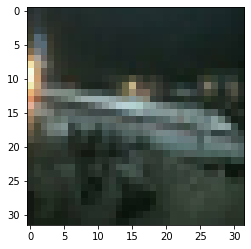

In [ ]:
img, label = test_dataset[0]
plt.imshow(img.permute(1,2,0))
print("Label:", dataset.classes[label], 'Predicted:', predict_image(img, model))

Label: automobile Predicted: bird


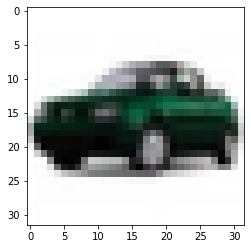

In [ ]:
img, label = test_dataset[1002]
plt.imshow(img.permute(1,2,0))
print("Label:", dataset.classes[label], 'Predicted:', predict_image(img, model))

Label: frog Predicted: bird


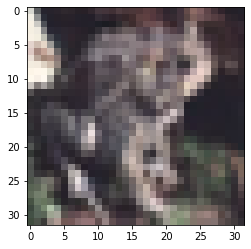

In [ ]:
img, label = test_dataset[6153]
plt.imshow(img.permute(1,2,0))
print("Label:", dataset.classes[label], 'Predicted:', predict_image(img, model))

## Identifying where our model performs poorly can help us improve the model, by collecting more training data, increasing/decreasing the complexity of the model, and chanhing the hyperparameters.
## As a final stpe, let's also look at the overall loss and accuracy of the model on the test set. We expect these values to be similar to those for the validation set, if not, we might need a better validation set that has similar data and distribution as the test set(which often comes from real world data).

In [ ]:
test_loader = DeviceDataLoader(DataLoader(dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_acc': 0.09964923560619354, 'val_loss': 3.1625659465789795}